## Project Title: Understanding graduation rates to student success and professional development

### Team Number: 11
### Team Members: 
- Pranava Kadiyala (pskadiya@andrew.cmu.edu)
- Matthew Wu (mrw2@andrew.cmu.edu)
- Hiba Hassan (hibah@andrew.cmu.edu)

### Target Variable: X3EVERDROP - a binary variable indicating whether the sample member ever dropped out of high school.
0 - Never dropped out
1 - Dropped out atleast once

### Question: How can we identify the key factors that influence drop out rates in a high school setting using classification machine learning techniques? 

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.metrics import r2_score 
import time
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

%matplotlib inline

---
## Outline

- Data Processing
- Feature Engineering and Feature Selection
- Model Tuning, Validation and Selection
- Feature Importance 
- Visualizations and Answering the Question

---
## Data Processing

In [2]:
seed = 4

In [3]:
df = pd.read_csv("data/hsls_17_students_clean.csv")
df.head()

,STU_ID,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,X4UNIV1,W1STUDENT,W2STUDENT,W3STUDENT,W4STUDENT,...,S2MUSIC,S2ART,S2DRAMA,S2SPORTS,S2CLUB,S2ACADEMIC,S3HSCRED,S3FOCUS,S3CLGFT,S3WORKFT
0,10001,11,1,1,1111,11111,375.667105,365.607062,392.215779,466.860846,...,0,1,0,1,1,0,1,1,1,-6
1,10002,11,1,1,1111,11111,189.309446,196.338045,236.571468,254.811585,...,1,0,0,0,0,0,1,1,1,2
2,10003,11,1,1,1111,11111,143.591863,137.678887,148.736833,156.626153,...,0,0,0,1,0,0,1,1,1,2
3,10005,11,1,1,1111,11111,145.019401,134.566242,152.708389,148.440875,...,1,1,0,0,0,0,1,-8,3,-8
4,10006,11,1,1,1111,11110,56.347833,56.495653,64.969992,0.000000,...,1,0,0,1,1,0,1,1,1,-6


In [4]:
df.shape

(17762, 214)

In [5]:
df.describe()

,STU_ID,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,X4UNIV1,W1STUDENT,W2STUDENT,W3STUDENT,W4STUDENT,...,S2MUSIC,S2ART,S2DRAMA,S2SPORTS,S2CLUB,S2ACADEMIC,S3HSCRED,S3FOCUS,S3CLGFT,S3WORKFT
count,17762.000000,17762.0,17762.0,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,...,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000,17762.000000
mean,22578.518748,11.0,1.0,1.220358,1109.438971,11095.173122,190.222035,203.206360,187.295879,181.591837,...,0.186803,0.005123,-0.064407,0.319390,-0.013399,-0.055962,-0.432159,0.646211,-1.780430,-3.950738
std,7264.179821,0.0,0.0,0.869554,3.603062,36.151704,236.493154,261.653481,272.106049,289.624357,...,1.294664,1.320677,1.317343,1.330416,1.421774,1.259665,3.207154,4.633756,3.930837,4.101301
min,10001.000000,11.0,1.0,1.000000,1100.000000,11000.000000,1.815257,1.978904,0.000000,0.000000,...,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
25%,16318.250000,11.0,1.0,1.000000,1111.000000,11110.000000,61.758569,65.694851,35.597093,19.081485,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-6.000000,-8.000000
50%,22554.500000,11.0,1.0,1.000000,1111.000000,11111.000000,132.599622,138.692509,118.996259,106.051859,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-6.000000
75%,28853.750000,11.0,1.0,1.000000,1111.000000,11111.000000,235.898775,253.731089,249.637380,246.301235,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000
max,35206.000000,11.0,1.0,6.000000,1111.000000,11111.000000,5500.479620,6613.912053,7217.880632,7891.911402,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,3.000000,2.000000


For analysisng X3EVERDROP we drop variables from later rounds. Our main objective is to model data for the future occurance of dropout from current data - hence for this purpose we will not use future data

In [6]:
# Removing X4 X5 Vars
x4x5 = []
for c in df.columns:
    if c[:2] == 'X4' or c[:2] == 'X5' or c[:2] == 'W4':
        x4x5.append(c)
df = df.drop(x4x5, axis=1)


In [7]:
columns = df.columns.tolist()

In [8]:
#Generating the list of tracking variables so that they are not included in the feature list used for modelling.
track_type = ['STU_ID', 'X2UNIV1', 'X2UNIV2A', 'X2UNIV2B', 'X3UNIV1', 'W1STUDENT', 'W2STUDENT', 'W3STUDENT',
              'X1TESTSTAT', 'X1SQSTAT', 'X2TESTSTAT', 'X2SQSTAT', 'X3SQSTAT']

In [9]:
#columns without tracking variables
col_no_track = list(set(columns) - set(track_type))

In [10]:
#Generating the list categorical variables in the new data frame

cat_type = ['X1SEX', 'X1RACE', 'X1STU30OCC_STEM1', 'X2STU30OCC_STEM1', 'X1CONTROL', 'X2CONTROL', 'X3CONTROL', 
            'X1LOCALE', 'X2LOCALE', 'X3LOCALE', 'X1REGION', 'X2REGION', 'X3REGION', 'X2ENROLSTAT',  'X2DROPSTAT', 'X2EVERDROP', 
            'X3DROPOUTTIME', 'X3DROPSTAT', 'X3EVERDROP', 'X3PROGLEVEL', 'X3CLGANDWORK', 'X3EVERGED', 'X3HSCOMPSTAT', 'X4HSCOMPSTAT',
           'X3ELLSTATUS','X4HSCOMPSTAT','X4EVRTRANSHS_R','X4EVRAPPCLG','X4PS1SELECT','X4REFDEGTYPE','X4PSENRSTLV',
            'X4RFDGCOMP','X4INCOMECAT','X4HSCLGCRED','X4REFSECTOR',
            'X4PS1DEGTYPE1','X4PSLFSTFB16','X4OCCFB2','X5LASTENR16','X5STEMCRED','X5PS1SEC',
            'X4EVERGED','X4EVR2YPUB','X4REFLEVEL','X4FB16ENRSTAT','X4RFDGMJSTEM','X4OCCFBSTEM1',
            'X5CTECRED','X4GEDPASSED','X4ATNDCLG16FB','X4PS1SECTOR','X4REFSELECT','X4ATPRLVLA','X4RFDGMJ123',
            'X4OCC30RELATE','X5PS1SLC','X4SQSTAT','X4EVERDROP','X4PS1LEVEL','X4ATNDCLG16FB','X4PS1LEVEL','X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4INCOMECAT',
            'X4PS1SELECT','X4PS1DEGTYPE1','X4PSLFSTFB16','X4OCCFB2','X5LASTENR16','X5STEMCRED','X4EVERDROP','X4EVRAPPCLG','X4REFSECTOR',
            'X4FB16ENRSTAT','X4OCCFBSTEM1','X5CTECRED','X4EVRTRANSHS_R','X4REFLEVEL','X4ATPRLVLA','X4OCC30RELATE',
            'X5PS1SLC','X4HSCLGCRED','X4EVR2YPUB','X4PS1SECTOR','X4REFSELECT','X5PS1SEC','X5PFYSEC','X4ATNDCLG16FB',
            'X4PS1LEVEL','X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4GEDPASSED','X4PS1SELECT','X4PS1DEGTYPE1','X4OCCFB2','X5STEMCRED','X4REFSECTOR',
            'X4OCCFBSTEM1','X5CTECRED','X4REFLEVEL','X4ATPRLVLA','X4OCC30RELATE','X4PS1SECTOR','X4REFSELECT',
            'X5LASTENR16','X5STEMCRED','X5CTECRED','X5PS1SLC','X5PS1SEC', 'X5SRRESP', 'X5PFYSLC', 'X5PFYDEGREE', 'X5PFYDEGREE', 'S1FAVSUBJ', 'S2GRD1112',
           'S2PASSGRADE', 'S2EDUEXP', 'S2CLG2013', 'S2FOCUS2013', 'S2CLGFT2013', 'S2AFFOCCTRN', 'S2AFF2YPUB', 'S2AFF4YIN', 'S2AFF4YOUT', 'S2AFF4YPRV', 'S2AFF4YSEL',
           'S2NEVERCLG', 'S2CANTAFFORD', 'S2MUSIC', 'S2ART', 'S2DRAMA', 'S2SPORTS', 'S2CLUB', 'S2ACADEMIC', 'S3HSCRED', 'S3FOCUS', 'S3CLGFT', 'S3WORKFT', 
            'S2SUREDIPL', 'S2INSCHSUSP', 'S1S8', 'S1HRWORK', 'S1WEBINFO', 'S1SUREHSGRAD', 'S1SCHWASTE', 'X1HHNUMBER',
           'X2HHNUMBER', 'X1PAREDEXPCT', 'X2PAREDEXPCT', 'X2STUEDEXPCT', 'X1STUEDEXPCT', 'S1M8', 'S1SAFE', 'S2SATNUM',
           'S1HRACTIVITY', 'S2ARRESTED', 'S1GOODGRADES', 'S1M8GRADE', 'S1S8GRADE', 'S2SCHWASTE']


cat_type_x4x5 = []
for c in cat_type:
    if c[:2] == 'X4' or c[:2] == 'X5' or c[:2] == 'S4' or c[:2] == 'S5':
        cat_type_x4x5.append(c)
cat_type_x1x2x3 = list(set(cat_type)-set(cat_type_x4x5))

#For the classification task, I am also interested in  how the panel 1 and panel 2 impact the classification, 
#generating alist of X3 categorical variables that I will not include in the model
cat_type_x3 = []
for c in cat_type:
    if c[:2] == 'X3' or c[:2] == 'S3':
        cat_type_x3.append(c)
cat_type_x1x2 = list(set(cat_type_x1x2x3)-set(cat_type_x3))



In [11]:
#Generating the list of numerical variables in the new data frame
num_type_x1x2x3 = list(set(col_no_track)-set(cat_type_x1x2x3))

                       
num_type_x3 = []
for c in num_type_x1x2x3:
    if c[:2] == 'X3' or c[:2] == 'S3':
        num_type_x3.append(c)

num_type_x1x2 = list(set(num_type_x1x2x3)-set(num_type_x3))

In [12]:
features = pd.concat([df[cat_type_x1x2], df[num_type_x1x2]], axis=1)

I am using only variables from the first two panels. 1st panel data was collected in 2009 and 2nd panel was on 2012.

In [13]:
#making the categorical adtype category
features[cat_type_x1x2] = features[cat_type_x1x2].astype('category')
features[cat_type_x1x2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17762 entries, 0 to 17761
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   X1STU30OCC_STEM1  17762 non-null  category
 1   S2PASSGRADE       17762 non-null  category
 2   S2AFFOCCTRN       17762 non-null  category
 3   S2FOCUS2013       17762 non-null  category
 4   S2AFF4YSEL        17762 non-null  category
 5   X1HHNUMBER        17762 non-null  category
 6   X2HHNUMBER        17762 non-null  category
 7   S1FAVSUBJ         17762 non-null  category
 8   S1S8GRADE         17762 non-null  category
 9   S1WEBINFO         17762 non-null  category
 10  S2SPORTS          17762 non-null  category
 11  X2PAREDEXPCT      17762 non-null  category
 12  X2STU30OCC_STEM1  17762 non-null  category
 13  S2DRAMA           17762 non-null  category
 14  X1REGION          17762 non-null  category
 15  S2MUSIC           17762 non-null  category
 16  S2GRD1112         1776

In [14]:
#generating age variable from X1STDOB
features['X1AGE'] = 2009 - features['X1STDOB'].astype(str).str[:4].astype('int64')
#dropping X1STDOB
features = features.drop(columns='X1STDOB')

num_type_x1x2x3 = list(set(num_type_x1x2x3)-set(['X1STDOB']))
num_type_x1x2 = list(set(num_type_x1x2)-set(['X1STDOB']))

---
## EDA Visualizations

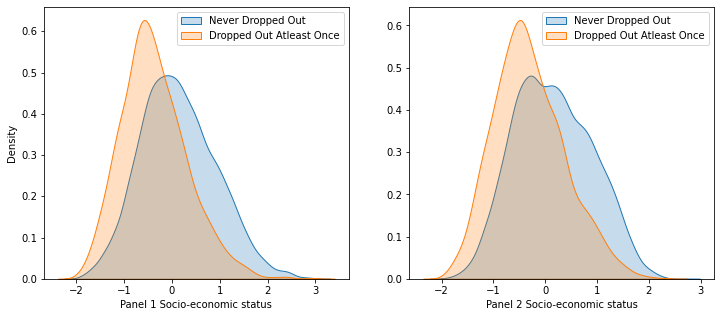

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(df['X1SES_U'][df['X3EVERDROP']==0], shade=True, label='Never Dropped Out', ax=ax1)
sns.kdeplot(df['X1SES_U'][df['X3EVERDROP']==1], shade=True, label='Dropped Out Atleast Once', ax=ax1)
ax1.set_xlabel('Panel 1 Socio-economic status')
ax1.set_ylabel('Density')
ax1.legend()

sns.kdeplot(df['X2SES_U'][df['X3EVERDROP']==0], shade=True, label='Never Dropped Out', ax=ax2)
sns.kdeplot(df['X2SES_U'][df['X3EVERDROP']==1], shade=True, label='Dropped Out Atleast Once', ax=ax2)
ax2.set_xlabel('Panel 2 Socio-economic status')
ax2.set_ylabel('')
ax2.legend()

plt.savefig('Socio-economic_status.png', bbox_inches='tight')

This shows that children with higher economic status are more likely to not drop out compared to those with a lower economic status

---
## Feature Engineering and Feature Selection

In [16]:
#some of these categorical variables regquire ordinal encoding rather than using them as dummies for each group
cat_ord_type_x1x2 = ['S2INSCHSUSP', 'S1HRWORK', 'S1WEBINFO', 'S1SCHWASTE', 'X2HHNUMBER', 'X2PAREDEXPCT', 'X1PAREDEXPCT',
                    'X2STUEDEXPCT', 'X1STUEDEXPCT', 'X1HHNUMBER', 'S1SAFE', 'S2SATNUM', 'S1HRACTIVITY', 'S1GOODGRADES',
                    'S1M8GRADE', 'S1S8GRADE', 'S2SCHWASTE']

cat_type_x1x2 = list(set(cat_type_x1x2) - set(cat_ord_type_x1x2))

In [17]:
#Generating dummies for all categorical variables
pd_dummy = pd.get_dummies(data=features[cat_type_x1x2])
features_new = pd.concat([features,pd_dummy],axis=1).drop(columns=cat_type_x1x2)

y = df['X3EVERDROP']
X = features_new.copy()

In [18]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
y_test

14053    0
6004     0
8964     0
17400    0
6328     0
        ..
9065     1
1431     0
11801    0
12537    0
12258    0
Name: X3EVERDROP, Length: 4441, dtype: int64

In [19]:
#standardising numerical variables in X_train 
scaler = RobustScaler()
X_train[num_type_x1x2] = scaler.fit_transform(X_train[num_type_x1x2])


Using Robust Scaler because standard scaler assumes normally distributed features which is not the case with the numerical data in our sample. 

In [20]:
#dealing with ordinal categorical variables
encoder = OrdinalEncoder()
X_train[cat_ord_type_x1x2] = encoder.fit_transform(X_train[cat_ord_type_x1x2])

In [21]:
#upscaling
sm = SMOTE(random_state=seed)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#### Feature selection

The three classifficationmodels chosen for comparision are: Logistic Regression (LR), Random Forest (RF) and Gradient Boosting (GB)

These three models are chosen because of their explanability - unlike KNN and Naive Bayes classification models, LR, RF and GB all allow for feature explainability either via coefficient values in LR or feature importance in RF and GB. Naive Bayes classififcation models are also not appropriate because they make independence assumptions for the features of our model - given that this is a panel data set - this assumption is not valid.

In [22]:
#feature selection
X_train.columns.tolist()

['X1HHNUMBER',
 'X2HHNUMBER',
 'S1S8GRADE',
 'S1WEBINFO',
 'X2PAREDEXPCT',
 'X2STUEDEXPCT',
 'S1M8GRADE',
 'S1GOODGRADES',
 'S2SATNUM',
 'S1SAFE',
 'S2SCHWASTE',
 'S1HRACTIVITY',
 'X1PAREDEXPCT',
 'S2INSCHSUSP',
 'S1HRWORK',
 'S1SCHWASTE',
 'X1STUEDEXPCT',
 'X2PROBLEM',
 'X1MTHID',
 'X1SCHOOLBEL',
 'X1TXMTSCOR',
 'X2SCIID',
 'X2NUMHS',
 'X1SCHOOLENG',
 'X2BEHAVEIN',
 'X2SES_U',
 'X2MTHID',
 'X1SES_U',
 'X1SCIID',
 'X2TXMTSCOR',
 'X1AGE',
 'X1STU30OCC_STEM1_-8',
 'X1STU30OCC_STEM1_0',
 'X1STU30OCC_STEM1_1',
 'X1STU30OCC_STEM1_4',
 'X1STU30OCC_STEM1_5',
 'X1STU30OCC_STEM1_6',
 'S2PASSGRADE_-8',
 'S2PASSGRADE_-6',
 'S2PASSGRADE_0',
 'S2PASSGRADE_1',
 'S2AFF4YPRV_-8',
 'S2AFF4YPRV_1',
 'S2AFF4YPRV_2',
 'S2AFF4YPRV_3',
 'X2LOCALE_1',
 'X2LOCALE_2',
 'X2LOCALE_3',
 'X2LOCALE_4',
 'S2AFFOCCTRN_-8',
 'S2AFFOCCTRN_1',
 'S2AFFOCCTRN_2',
 'S2AFFOCCTRN_3',
 'S2FOCUS2013_-9',
 'S2FOCUS2013_-7',
 'S2FOCUS2013_1',
 'S2FOCUS2013_2',
 'S2FOCUS2013_3',
 'S2FOCUS2013_4',
 'S2FOCUS2013_5',
 'S2AFF4YSEL_-8

The variables I really care about are - 'X1RACE_1','X1RACE_2','X1RACE_3','X1RACE_4','X1RACE_6','X1RACE_7','X1RACE_8', X1SEX_1, X1SEX_2, X1SES_U, X2SES_U, X1AGE, X1TXMTSCOR, X2TXMTSCOR.
Based on domain knowledge, these factors are often important predictors of dropout status. Additionally for policy decisions, knowing feature importance of these features that are often cited in literature will help identify the accurate targeted policy measures.

In [23]:
X_train_smote.shape

(24002, 225)

In [24]:
#features we want to really keep in our analysis
impt_features = ['X1RACE_1','X1RACE_2','X1RACE_3','X1RACE_4',
                 'X1RACE_6','X1RACE_7','X1RACE_8', 'X1SEX_1', 
                 'X1SEX_2', 'X1SES_U', 'X2SES_U', 'X1AGE', 
                 'X1TXMTSCOR', 'X2TXMTSCOR']

#list of features to be used for 
features_to_select = list(set(X_train.columns.tolist())-set(impt_features))


In [25]:
len(features_to_select)

211

To ensure comparability acorss all models we use a feature selection method that is supported by all models so that we can find the same set of best features for all models for accurate comparability.

We choose SelectFromModel feature selector for this purpose - given our focus on inference and feature importance and also computational efficiency, SelectFromModel suits these objectives the best

In [26]:
#feature selection for Logistic Regression
X_train_smote_to_select = X_train_smote[features_to_select]

pipe = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression())),
    ('classification', LogisticRegression(max_iter=1000000, random_state=seed))
])

start = time.time()

parameters = {'feature_selection__threshold': [0, '0.25*mean', '0.5*mean', 'mean', '1.25*mean'] }

grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train_smote_to_select, y_train_smote)

best_threshold = grid.best_estimator_.named_steps['feature_selection'].threshold
lr_sel = X_train_smote_to_select.columns[grid.best_estimator_.named_steps['feature_selection'].get_support()].tolist()
print("Best threshold for Logistic Regression:", best_threshold)
print('\n')
print("Selected features from Logistic Regression:", lr_sel)

computation_time = (time.time()-start)
print('\n')
print('\n')
print("Computation time (seconds): %5.3f"%computation_time)

/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Best threshold for Logistic Regression: 1.25*mean


Selected features from Logistic Regression: ['S2AFFOCCTRN_3', 'X2LOCALE_4', 'S2FOCUS2013_-7', 'S2ARRESTED_1.1179883945841391', 'S2GRD1112_1', 'X1LOCALE_3', 'X2DROPSTAT_3', 'S2SPORTS_1', 'X1STU30OCC_STEM1_1', 'X1REGION_4', 'X1STU30OCC_STEM1_0', 'S2NEVERCLG_0', 'S2FOCUS2013_1', 'S2CANTAFFORD_3', 'X2REGION_2', 'S1S8_9', 'S2ARRESTED_1.0', 'S1S8_4', 'S2AFF4YPRV_-8', 'X2REGION_4', 'X2ENROLSTAT_1', 'S2FOCUS2013_3', 'X2REGION_1', 'S1FAVSUBJ_5', 'X1REGION_2', 'X2EVERDROP_0', 'S2CLGFT2013_2', 'X2CONTROL_1', 'S2PASSGRADE_-6', 'S2AFFOCCTRN_1', 'X1CONTROL_1', 'S1FAVSUBJ_3', 'X2REGION_3', 'X1STU30OCC_STEM1_4', 'S1S8_5', 'X2ENROLSTAT_2', 'S2EDUEXP_10', 'S1S8_2', 'X2LOCALE_2', 'S2CANTAFFORD_4', 'S1SUREHSGRAD_-8', 'S2NEVERCLG_1', 'S2CANTAFFORD_2', 'X2DROPSTAT_0', 'S2CLG2013_1', 'S1M8_6', 'S2SUREDIPL_1', 'S2SPORTS_0', 'S2AFF4YIN_3', 'S1FAVSUBJ_9', 'X2ENROLSTAT_5', 'S2AFF4YOUT_-8', 'S1FAVSUBJ_4', 'S1FAVSUBJ_11', 'X2CONTROL_2', 'X2EVERDROP_1', 'X1REGION_

For feature selection - we are tuning the threshold parameter - we are using the same range for parameters anchored against the mean.

In [27]:

#Feature selection for random forest
pipe = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),
    ('classification', RandomForestClassifier(random_state=seed))
])

start = time.time()

parameters = {'feature_selection__threshold': [0, '0.25*mean', '0.5*mean', 'mean', '1.25*mean'] }

grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train_smote_to_select, y_train_smote)

best_threshold = grid.best_estimator_.named_steps['feature_selection'].threshold
rf_sel = X_train_smote_to_select.columns[grid.best_estimator_.named_steps['feature_selection'].get_support()].tolist()
print("Best threshold for Random Forest:", best_threshold)
print('\n')
print("Selected features from Random Forest:", rf_sel)

computation_time = (time.time()-start)
print('\n')
print('\n')
print("Computation time (seconds): %5.3f"%computation_time)

Best threshold for Random Forest: 0


Selected features from Random Forest: ['S1SUREHSGRAD_1', 'X1STU30OCC_STEM1_-8', 'X2PROBLEM', 'S2AFFOCCTRN_3', 'S1M8_7', 'S2PASSGRADE_1', 'X2STU30OCC_STEM1_4', 'S2FOCUS2013_4', 'S1FAVSUBJ_10', 'S1FAVSUBJ_8', 'S2AFF4YOUT_2', 'S2ART_1', 'X2LOCALE_4', 'S2CLUB_-8', 'S2FOCUS2013_-7', 'S1S8GRADE', 'S1WEBINFO', 'S2CANTAFFORD_-8', 'S2ARRESTED_1.1179883945841391', 'S2FOCUS2013_-9', 'S1SUREHSGRAD_2', 'S2GRD1112_4', 'S2GRD1112_1', 'S2NEVERCLG_-8', 'X2STU30OCC_STEM1_-8', 'X1LOCALE_3', 'S1S8_11', 'S2SPORTS_-8', 'S1S8_12', 'S2MUSIC_-8', 'X1SCHOOLENG', 'X2DROPSTAT_3', 'S2SPORTS_1', 'X1STU30OCC_STEM1_1', 'S1FAVSUBJ_-8', 'X1REGION_4', 'S1M8GRADE', 'X1STU30OCC_STEM1_0', 'S2NEVERCLG_0', 'S2AFF4YPRV_2', 'S2FOCUS2013_1', 'S1GOODGRADES', 'S2CANTAFFORD_3', 'S1S8_7', 'X2LOCALE_1', 'X2DROPSTAT_2', 'S2DRAMA_-8', 'X2REGION_2', 'X2ENROLSTAT_3', 'X2STU30OCC_STEM1_6', 'S1S8_9', 'S2DRAMA_1', 'S2AFF4YSEL_3', 'X1LOCALE_2', 'S1FAVSUBJ_1', 'S2ARRESTED_1.0', 'S2AFF2YPUB_2', 'S2MUSIC_1

In [28]:
#Feature selection for gradient boosting
pipe = Pipeline([
    ('feature_selection', SelectFromModel(GradientBoostingClassifier())),
    ('classification', GradientBoostingClassifier(random_state=seed))
])

start = time.time()

parameters = {'feature_selection__threshold': [0, '0.25*mean', '0.5*mean', 'mean', '1.25*mean'] }

grid = GridSearchCV(pipe, parameters, cv=5).fit(X_train_smote_to_select, y_train_smote)

best_threshold = grid.best_estimator_.named_steps['feature_selection'].threshold
gb_sel = X_train_smote_to_select.columns[grid.best_estimator_.named_steps['feature_selection'].get_support()].tolist()
print("Best threshold for Gradient Boosting:", best_threshold)
print('\n')
print("Selected features from Gradient Boosting:", gb_sel)

computation_time = (time.time()-start)
print('\n')
print('\n')
print("Computation time (seconds): %5.3f"%computation_time)

Best threshold for Gradient Boosting: 0


Selected features from Gradient Boosting: ['S1SUREHSGRAD_1', 'X1STU30OCC_STEM1_-8', 'X2PROBLEM', 'S2AFFOCCTRN_3', 'S1M8_7', 'S2PASSGRADE_1', 'X2STU30OCC_STEM1_4', 'S2FOCUS2013_4', 'S1FAVSUBJ_10', 'S1FAVSUBJ_8', 'S2AFF4YOUT_2', 'S2ART_1', 'X2LOCALE_4', 'S2CLUB_-8', 'S2FOCUS2013_-7', 'S1S8GRADE', 'S1WEBINFO', 'S2CANTAFFORD_-8', 'S2ARRESTED_1.1179883945841391', 'S2FOCUS2013_-9', 'S1SUREHSGRAD_2', 'S2GRD1112_4', 'S2GRD1112_1', 'S2NEVERCLG_-8', 'X2STU30OCC_STEM1_-8', 'X1LOCALE_3', 'S1S8_11', 'S2SPORTS_-8', 'S1S8_12', 'S2MUSIC_-8', 'X1SCHOOLENG', 'X2DROPSTAT_3', 'S2SPORTS_1', 'X1STU30OCC_STEM1_1', 'S1FAVSUBJ_-8', 'X1REGION_4', 'S1M8GRADE', 'X1STU30OCC_STEM1_0', 'S2NEVERCLG_0', 'S2AFF4YPRV_2', 'S2FOCUS2013_1', 'S1GOODGRADES', 'S2CANTAFFORD_3', 'S1S8_7', 'X2LOCALE_1', 'X2DROPSTAT_2', 'S2DRAMA_-8', 'X2REGION_2', 'X2ENROLSTAT_3', 'X2STU30OCC_STEM1_6', 'S1S8_9', 'S2DRAMA_1', 'S2AFF4YSEL_3', 'X1LOCALE_2', 'S1FAVSUBJ_1', 'S2ARRESTED_1.0', 'S2AFF2YPUB_2', 'S

The final features selected are too many, there is still very high dimensionality.

In [29]:
start = time.time()
#for logistic regression
lr_selector = SelectFromModel(LogisticRegression(max_iter=10000, random_state=seed))
lr_selector.fit(X_train_smote_to_select, y_train_smote)
lr_selected = lr_selector.get_support()
print(X_train_smote_to_select.columns[lr_selected])
lr_sel = X_train_smote_to_select.columns[lr_selected].tolist()

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

Index(['S1SUREHSGRAD_1', 'X1STU30OCC_STEM1_-8', 'S2FOCUS2013_4', 'X2LOCALE_4',
       'S2CLUB_-8', 'S2FOCUS2013_-7', 'S1SUREHSGRAD_2', 'S2GRD1112_1',
       'X2STU30OCC_STEM1_-8', 'X1LOCALE_3', 'S2SPORTS_-8', 'S2MUSIC_-8',
       'X2DROPSTAT_3', 'S2SPORTS_1', 'X1STU30OCC_STEM1_1', 'X1REGION_4',
       'X1STU30OCC_STEM1_0', 'S2FOCUS2013_1', 'S2CANTAFFORD_3', 'X2LOCALE_1',
       'X2REGION_2', 'X2ENROLSTAT_3', 'S1S8_9', 'S2MUSIC_1', 'S1S8_4',
       'S2AFF4YPRV_-8', 'S2DRAMA_0', 'S2AFF4YSEL_2', 'X2REGION_4',
       'S2EDUEXP_5', 'S1M8_-8', 'X2ENROLSTAT_1', 'S2FOCUS2013_3', 'X2REGION_1',
       'S1FAVSUBJ_5', 'S1S8_13', 'X1REGION_2', 'X2EVERDROP_0', 'S2GRD1112_-8',
       'S2AFFOCCTRN_1', 'S2SUREDIPL_4', 'X2REGION_3', 'X1STU30OCC_STEM1_4',
       'S2CANTAFFORD_1', 'S1S8_-6', 'S2ART_-8', 'S2AFF4YOUT_1', 'S1S8_3',
       'S1S8_5', 'X2ENROLSTAT_2', 'X2ENROLSTAT_4', 'S2EDUEXP_10', 'S1S8_2',
       'X2NUMHS', 'X2LOCALE_2', 'X2STU30OCC_STEM1_5', 'S2CANTAFFORD_4',
       'S1SUREHSGRAD_-8', 'S2CA

In [30]:
print("Threshold for LR:", lr_selector.threshold_)

Threshold for LR: 0.5650386232547246


In [31]:
#Random Forest
start = time.time()

rf_selector = SelectFromModel(RandomForestClassifier(random_state=seed))
rf_selector.fit(X_train_smote_to_select, y_train_smote)
rf_selected = rf_selector.get_support()
print(X_train_smote_to_select.columns[rf_selected])
rf_sel = X_train_smote_to_select.columns[rf_selected].tolist()

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

Index(['S1SUREHSGRAD_1', 'X2PROBLEM', 'S1S8GRADE',
       'S2ARRESTED_1.1179883945841391', 'X2DROPSTAT_3', 'S2SPORTS_1',
       'S1M8GRADE', 'S2FOCUS2013_1', 'S1GOODGRADES', 'S1HRACTIVITY',
       'X2ENROLSTAT_1', 'S2INSCHSUSP', 'X2EVERDROP_0', 'S2PASSGRADE_-6',
       'S2AFFOCCTRN_1', 'S2AFF4YOUT_1', 'X2NUMHS', 'X2DROPSTAT_0',
       'S2CLG2013_1', 'X2STUEDEXPCT', 'S2SUREDIPL_1', 'S1SAFE', 'S2SCHWASTE',
       'X2EVERDROP_1', 'S2AFF2YPUB_1', 'S1M8_4', 'S2CLGFT2013_1',
       'S2AFF4YIN_1', 'S2GRD1112_3'],
      dtype='object')
Computation time (seconds): 1.960


In [32]:
print("Threshold for RF:", rf_selector.threshold_)

Threshold for RF: 0.004739336492890996


In [33]:
#GB
start = time.time()

gb_selector = SelectFromModel(GradientBoostingClassifier(random_state=seed))
gb_selector.fit(X_train_smote_to_select, y_train_smote)
gb_selected = gb_selector.get_support()
print(X_train_smote_to_select.columns[gb_selected])
gb_sel = X_train_smote_to_select.columns[gb_selected].tolist()

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

Index(['X2ENROLSTAT_1', 'S2INSCHSUSP', 'X2EVERDROP_0', 'X2ENROLSTAT_2',
       'X2NUMHS', 'X2DROPSTAT_0', 'S2SUREDIPL_1', 'S2SUREDIPL_2'],
      dtype='object')
Computation time (seconds): 11.250


In [34]:
print("Threshold for RF:", gb_selector.threshold_)

Threshold for RF: 0.004739336492890996


In [35]:
#intersection of features from all these selector supports
rf_lr_selected = set(rf_sel).intersection(set(lr_sel))
selected = list(rf_lr_selected.intersection(set(gb_sel)))
print(selected)

#adding to the list of important features
X_train_smote_final = pd.concat([X_train_smote[impt_features], X_train_smote[selected]], axis=1)

X_test_final = pd.concat([X_test[impt_features], X_test[selected]], axis=1)

['X2ENROLSTAT_1', 'X2NUMHS', 'X2DROPSTAT_0', 'X2EVERDROP_0', 'S2SUREDIPL_1']


In [36]:
X_train_smote_final

,X1RACE_1,X1RACE_2,X1RACE_3,X1RACE_4,X1RACE_6,X1RACE_7,X1RACE_8,X1SEX_1,X1SEX_2,X1SES_U,X2SES_U,X1AGE,X1TXMTSCOR,X2TXMTSCOR,X2ENROLSTAT_1,X2NUMHS,X2DROPSTAT_0,X2EVERDROP_0,S2SUREDIPL_1
0,0,0,0,0,0,0,1,0,1,-0.198529,-0.062639,15,-1.522456,-0.300409,1,0.000000,1,1,1
1,0,0,0,0,0,0,1,1,0,0.320407,-0.524602,15,0.477339,0.815646,1,0.000000,1,1,1
2,0,0,0,1,0,0,0,1,0,-0.854600,-0.849008,15,-0.046882,-1.054762,0,2.000000,1,1,0
3,0,0,0,1,0,0,0,1,0,0.595314,0.368805,15,-0.180763,0.880210,1,0.000000,1,1,1
4,0,0,0,0,0,0,1,1,0,0.458632,0.410357,14,1.045185,-0.012580,1,0.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23997,0,0,0,0,0,0,0,1,0,-0.365226,-0.300074,15,-0.501992,-0.456687,0,1.767142,0,0,0
23998,0,0,0,0,0,0,0,0,1,-0.271517,-0.245193,15,-0.319207,-0.326451,0,1.311393,0,0,1
23999,0,0,0,0,0,0,0,0,0,-0.546400,-0.841992,14,-0.238726,-0.264299,0,0.897904,0,0,0
24000,0,0,0,0,0,0,0,0,0,0.278832,0.251846,14,-0.373214,-0.331672,0,1.673106,0,0,0


The feature selector worked better without tuning, in idenitfying more important features for the model.

---
## Model Tuning, Validation and Selection

#### Logistic Regression

In [37]:
#hyperparameter tuning logistic regression
start = time.time()
lr = LogisticRegression(max_iter=10000, random_state=seed)
parameters = {'solver'  : ['lbfgs', 'liblinear','newton-cg','sag','saga']}
tuning_lr = GridSearchCV(lr,                     # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_lr.fit(X_train_smote_final,y_train_smote)
print("The tuned parameters are:", tuning_lr.best_params_)

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

The tuned parameters are: {'solver': 'lbfgs'}
Computation time (seconds): 30.778


                          precision    recall  f1-score   support

       Never Dropped Out      0.905     1.000     0.950      4019
Dropped Out Atleast Once      0.000     0.000     0.000       422

                accuracy                          0.905      4441
               macro avg      0.452     0.500     0.475      4441
            weighted avg      0.819     0.905     0.860      4441



/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pranavakadiyala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

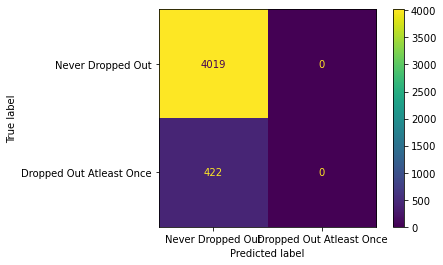

In [38]:
#running logistic regression with the best performing parameters
lr = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=seed)
lr.fit(X_train_smote_final,y_train_smote)

lr_pred = lr.predict(X_test_final)

cm_lr = confusion_matrix(y_test, lr_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=['Never Dropped Out','Dropped Out Atleast Once'])
display_cm_lr.plot()


print(classification_report(y_test, lr_pred, digits=3, target_names=['Never Dropped Out','Dropped Out Atleast Once']))

#### Random Classifier

In [39]:
start = time.time()
rf = RandomForestClassifier(random_state=seed)
parameters = {'n_estimators'  : [50, 100, 150, 200],
              'max_depth': [5, 10, 20, 30, None],
             'min_samples_split': [2, 5, 7, 10]}
tuning_rf = GridSearchCV(rf,                     # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_rf.fit(X_train_smote_final,y_train_smote)
print(tuning_rf.best_params_)

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
Computation time (seconds): 1143.781


                          precision    recall  f1-score   support

       Never Dropped Out      0.980     1.000     0.990      4019
Dropped Out Atleast Once      1.000     0.803     0.891       422

                accuracy                          0.981      4441
               macro avg      0.990     0.902     0.940      4441
            weighted avg      0.982     0.981     0.980      4441



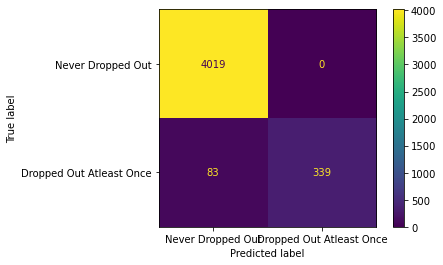

In [40]:
rf = RandomForestClassifier(max_depth= None, min_samples_split = 2, n_estimators = 150, random_state=seed)
rf.fit(X_train_smote_final,y_train_smote)

rf_pred = rf.predict(X_test_final)

cm_rf = confusion_matrix(y_test, rf_pred)
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=['Never Dropped Out','Dropped Out Atleast Once'])
display_cm_rf.plot()


print(classification_report(y_test, rf_pred, digits=3, target_names=['Never Dropped Out','Dropped Out Atleast Once']))

#### Gradient Boosting

In [41]:
start = time.time()
gb = GradientBoostingClassifier(random_state=seed)
parameters = {'n_estimators'  : [50, 100, 150],
              'max_depth': [10, 20, 30],
             'learning_rate': [0.001, 0.01, 0.1]}
tuning_gb = GridSearchCV(gb,                     # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_gb.fit(X_train_smote_final,y_train_smote)
print(tuning_gb.best_params_)

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
Computation time (seconds): 2315.980


                          precision    recall  f1-score   support

       Never Dropped Out      0.980     0.998     0.989      4019
Dropped Out Atleast Once      0.974     0.806     0.882       422

                accuracy                          0.980      4441
               macro avg      0.977     0.902     0.935      4441
            weighted avg      0.979     0.980     0.979      4441



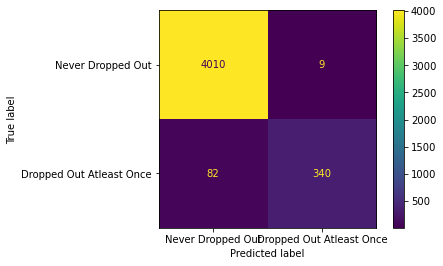

In [42]:
gb = GradientBoostingClassifier(max_depth= 10, learning_rate = 0.1, n_estimators = 150, random_state=seed)
gb.fit(X_train_smote_final,y_train_smote)

gb_pred = gb.predict(X_test_final)

cm_gb = confusion_matrix(y_test, gb_pred)
display_cm_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Never Dropped Out','Dropped Out Atleast Once'])
display_cm_gb.plot()

print(classification_report(y_test, gb_pred, digits=3, target_names=['Never Dropped Out','Dropped Out Atleast Once']))

#### ROC and AUC

In [43]:
# Generating ROC and AUC
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test_final)[:, 1])
lr_auc= roc_auc_score(y_test, lr.predict_proba(X_test_final)[:, 1])
gb_auc= roc_auc_score(y_test, gb.predict_proba(X_test_final)[:, 1])

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test_final)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test_final)[:, 1])
gb_fpr, gb_tpr, gb_threshold = roc_curve(y_test, gb.predict_proba(X_test_final)[:, 1])


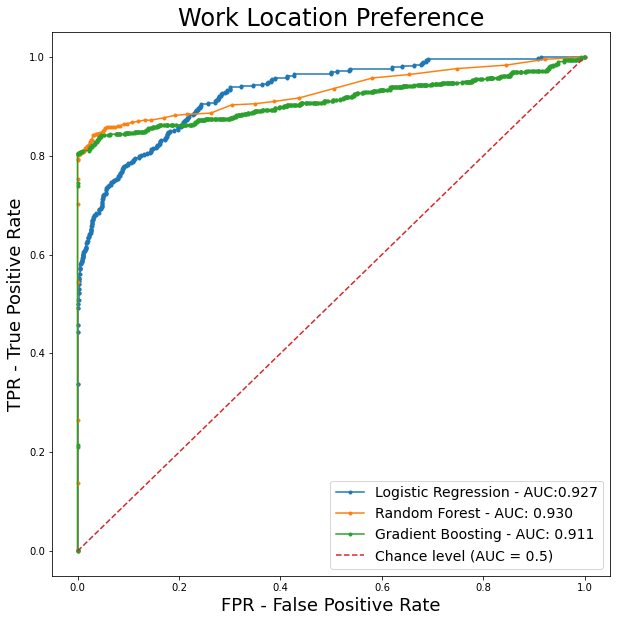

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression - AUC:%.3f' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest - AUC: %.3f' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting - AUC: %.3f' % gb_auc)

plt.plot([0, 1], [0, 1], "--", label="Chance level (AUC = 0.5)")
plt.xlabel('FPR - False Positive Rate', fontsize=18)
plt.ylabel('TPR - True Positive Rate', fontsize=18)
plt.title('Work Location Preference',  fontsize=24)
plt.legend(loc='lower right', fontsize=14)
plt.show()

We check to see if the high accuracy is a result of very high correlation between the features and the target variable. Essentially, we want to avoid a situation where one of the features' relationship with the target is one-on-one such that looking at the feature is as good as using the target variable.

In [45]:
#seeing correlation of the features finally selected with the target variable
corr_df = pd.concat([X_train_smote_final, y_train], axis=1)
corr_matrix = corr_df.corr()
print(corr_matrix.iloc[-1, :-1].sort_values())

X2DROPSTAT_0    -0.010022
X2EVERDROP_0    -0.010022
X1AGE           -0.009884
X1RACE_3        -0.009256
X1RACE_6        -0.009097
X2TXMTSCOR      -0.007009
X1SEX_1         -0.006083
S2SUREDIPL_1    -0.004290
X1RACE_7        -0.004287
X2SES_U         -0.003070
X2ENROLSTAT_1   -0.002548
X1SES_U         -0.002377
X1RACE_8         0.000424
X1TXMTSCOR       0.000450
X1SEX_2          0.000533
X1RACE_2         0.004324
X1RACE_1         0.004448
X1RACE_4         0.007609
X2NUMHS          0.008795
Name: X3EVERDROP, dtype: float64


### Conclusion - best model: Random Forest
Both Random Forest and Gradient Boost Models work equally well when it comes to performance as per the confusion matrix. Even with resampling, the majority class ('Never Dropped Out') has much higher f1-score than the minority class ('Dropped out atleast once').

However looking at the ROC and AUC curves, random forest outperforms grdient boost model marginally. 

Looking at AUC, even though logistic regression has the highest AUC of all three models, it performs terribly to classify the minority class, hence this is not the ideal model

---
## Answering Question

### Feature Importance

In [46]:
#Logistic Rergession
fimp_lr = pd.DataFrame({'Features':X_train_smote_final.columns, 'Importance': np.array(lr.coef_[0])})

Text(0, 0.5, 'Feature Names')

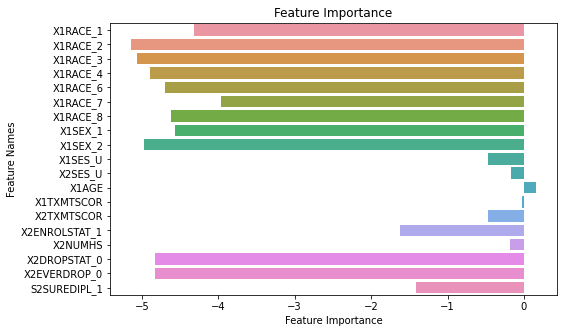

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Features',data=fimp_lr)

plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

Feature Importance for Random Forest and Gradient Boosting

In [48]:
#Random Forest
#getting feature importances
fimp_rf = rf.feature_importances_

#putting them into dataframe
fimp_rf = pd.DataFrame({'Features':X_train_smote_final.columns,'Importance':np.array(rf.feature_importances_)})
#fimp_rf.sort_values(by=['Importance'], ascending=False, inplace=True)


In [49]:
#Gradient Boosting
#getting feature importances
fimp_gb = gb.feature_importances_

#putting them into dataframe
fimp_gb = pd.DataFrame({'Features':X_train_smote_final.columns,'Importance':np.array(gb.feature_importances_)})
#fimp_gb.sort_values(by=['Importance'], ascending=False, inplace=True)

Text(0, 0.5, 'Feature Names')

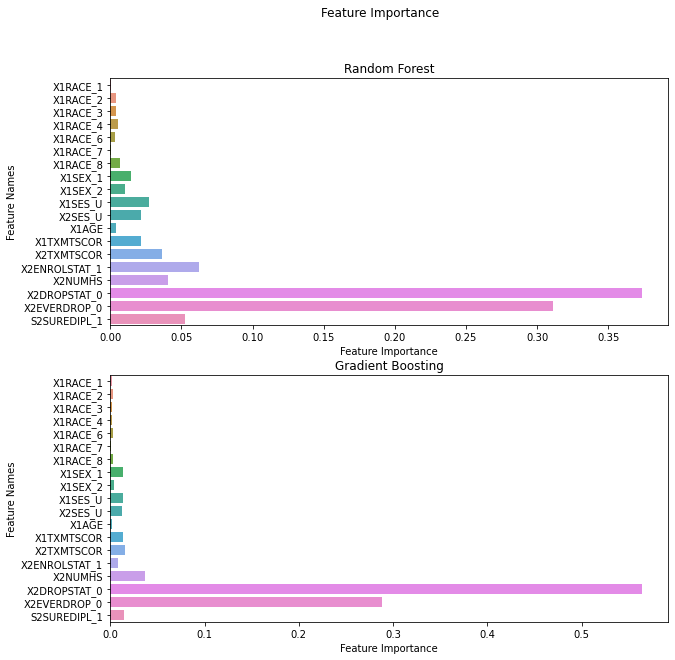

In [50]:
#plotting feature importances 
fig, axes = plt.subplots(2, figsize=(10, 10))
fig.suptitle('Feature Importance')

fig1 = sns.barplot(x='Importance', y='Features',data=fimp_rf, ax=axes[0])
fig1.set_title('Random Forest')
fig1.set_xlabel('Feature Importance')
fig1.set_ylabel('Feature Names')


fig2 = sns.barplot(x='Importance', y='Features',data=fimp_gb, ax=axes[1])
fig2.set_title('Gradient Boosting')
fig2.set_xlabel('Feature Importance')
fig2.set_ylabel('Feature Names')

### Race as potential Factor of Dropping out

Text(0, 0.5, 'Race')

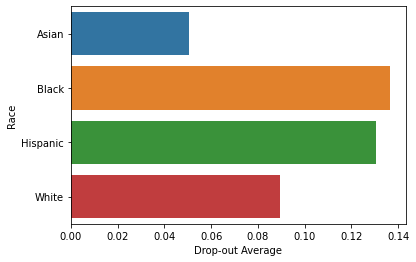

In [52]:
X_train_new = pd.concat([X_train[impt_features], X_train[selected]], axis=1)
X_train_new['Predict_rf'] = gb.predict(X_train_new)

drop_asian = X_train_new.loc[X_train_new['X1RACE_2'] > 0, 'Predict_rf'].mean()
drop_black = X_train_new.loc[X_train_new['X1RACE_3'] > 0, 'Predict_rf'].mean()
drop_hispanic = X_train_new.loc[X_train_new['X1RACE_4'] > 0, 'Predict_rf'].mean()
drop_white = X_train_new.loc[X_train_new['X1RACE_8'] > 0, 'Predict_rf'].mean()


x = [drop_asian, drop_black, drop_hispanic, drop_white]
y = ['Asian', 'Black', 'Hispanic', 'White']

df = pd.DataFrame({'Classification': x, 'Race': y})
sns.barplot(x='Classification', y='Race',data=df)
plt.xlabel('Drop-out Average')
plt.ylabel('Race')

---
## References

1. https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
2. https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9
3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
4. In class exercise 12
5. HW3
6. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
7. https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
